## Exercise 1- Linear Regression

In [1]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_file = 'database/ex1data1.txt'
column_values = np.loadtxt(input_file,delimiter=',',usecols=(0,1),unpack=True) 

# creating X & y matrices as suggested in the course
X = np.transpose(np.array(column_values[:-1]))
y = np.transpose(np.array(column_values[-1:]))

# getting training set length
m = y.size 

# insert ones to X (x0)
X = np.insert(X,0,1,axis=1)

Text(0.5, 0, "City's Population")

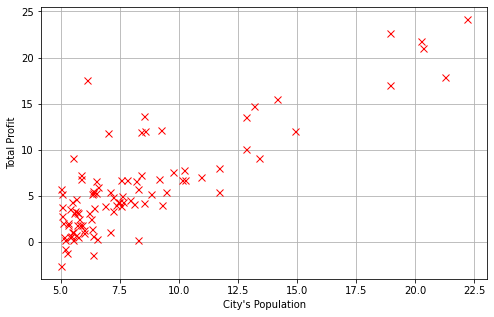

In [3]:
# plotting the data
plt.figure(figsize=(8,5))
plt.plot(X[:,1],y[:,0],'rx',markersize=7)
plt.grid(True)

plt.ylabel("Total Profit")
plt.xlabel("City's Population") # both in 10000s

### Gradient Descent

In [4]:
iterations = 1500
alpha = 0.01

# defining the linear hypothesis function
def h(theta,X): 
    return np.dot(X,theta)

# cost function
def computeCost(theta,X,y): 
    """
    theta_initial: n-dimensional vector of initial theta guess
    n: number of features
    m: number of training examples provided
    X: matrix with n-columns and m-rows
    y: m-dimensional vector
    """
    
    return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [5]:
initial_theta = np.zeros((X.shape[1],1))
display(computeCost(initial_theta,X,y)) # cost with all zeros

32.072733877455676

In [6]:
# implementing gradient descent
def descendGradient(X, theta_initial = np.zeros(2)):
    theta = theta_initial
    vec_j = [] #  for plotting cost as function of iteration
    history_theta = [] # for visualizing the minimization path later on
    for i in range(iterations):
        temp_theta = theta
        vec_j.append(computeCost(theta,X,y))
        history_theta.append(list(theta[:,0]))
        # updating theta values on the fly
        for j in range(len(temp_theta)):
            temp_theta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = temp_theta
    return theta, history_theta, vec_j

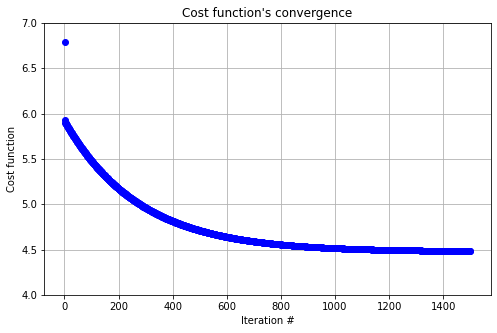

In [7]:
# executing the above defined gradient descent function
initial_theta = np.zeros((X.shape[1],1))
theta, history_theta, vec_j = descendGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(vec_j):
    plt.figure(figsize=(8,5))
    plt.plot(range(len(vec_j)),vec_j,'bo')
    plt.grid(True)
    plt.title("Cost function's convergence")
    plt.xlabel("Iteration #")
    plt.ylabel("Cost function")
    temp_plot = plt.xlim([-0.05*iterations,1.05*iterations])

plotConvergence(vec_j)
temp_plot = plt.ylim([4,7])

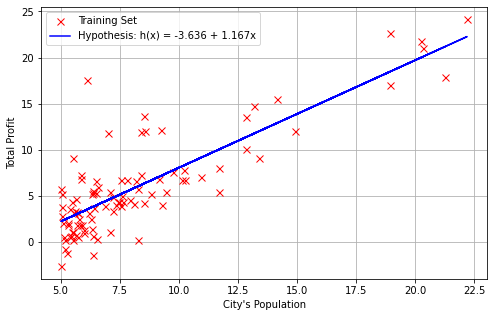

In [8]:
# verifying the line of best fit
def bestfit(x):
    return theta[0] + theta[1]*x

plt.figure(figsize=(8,5))
plt.plot(X[:,1],y[:,0],'rx',markersize=7,label='Training Set')
plt.plot(X[:,1],bestfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.3f + %0.3fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel("Total Profit")
plt.xlabel("City's Population") # both in 10000s
plt.legend()

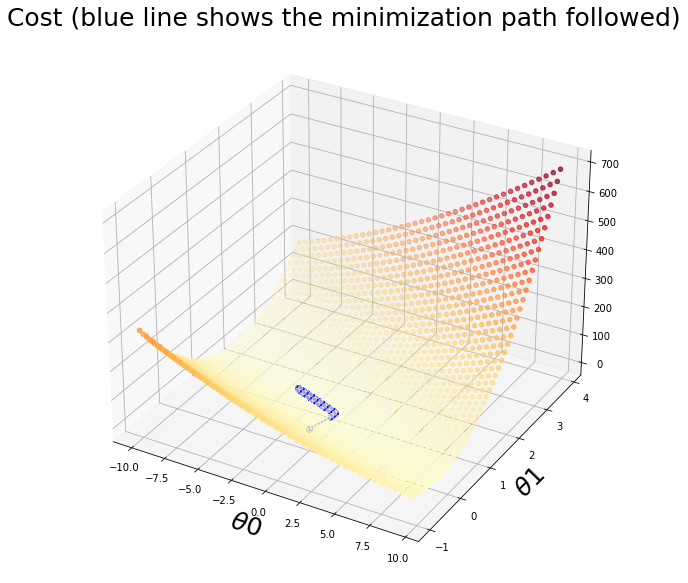

In [9]:
# visualizing j(theta)
# import necessary libraries for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for i in xvals:
    for j in yvals:
        myxs.append(i)
        myys.append(j)
        myzs.append(computeCost(np.array([[i], [j]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta 0$',fontsize=25)
plt.ylabel(r'$\theta 1$',fontsize=25)
plt.title('Cost (blue line shows the minimization path followed)',fontsize=25)
plt.plot([x[0] for x in history_theta],[x[1] for x in history_theta],vec_j,'bo-')
plt.show()

### Multivariate Regression

In [10]:
input_file = 'database/ex1data2.txt'
column_values = np.loadtxt(input_file,delimiter=',',usecols=(0,1,2),unpack=True) 

# creating X & y matrices as suggested in the course
X = np.transpose(np.array(column_values[:-1]))
y = np.transpose(np.array(column_values[-1:]))

# getting training set length
m = y.size 

# insert ones to X (x0)
X = np.insert(X,0,1,axis=1)

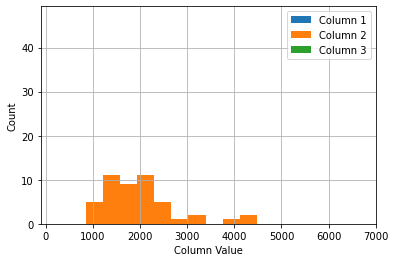

In [11]:
# visualizing the data
plt.grid(True)
plt.xlim([-100,7000])

dummyplot = plt.hist(X[:,0],label = 'Column 1')
dummyplot = plt.hist(X[:,1],label = 'Column 2')
dummyplot = plt.hist(X[:,2],label = 'Column 3')

plt.xlabel('Column Value')
plt.ylabel('Count')
dummyplot = plt.legend()

#### Note: As we can infer from the above plot, we need Feature Normalization.

In [12]:
# feature normalizing the columns (subtract mean, divide by standard deviation)
feature_means, feature_deviations = [], []
X_normalized = X.copy()
for i in range(X_normalized.shape[1]):
    feature_means.append(np.mean(X_normalized[:,i]))
    feature_deviations.append(np.std(X_normalized[:,i]))
    # ignore the first column
    if not i:
        continue
    # using the stored values of mean and standard devation
    X_normalized[:,i] = (X_normalized[:,i] - feature_means[-1])/feature_deviations[-1]

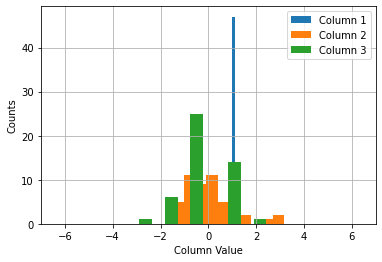

In [13]:
# visualizing the feature-normalized data
plt.grid(True)
plt.xlim([-7,7])

dummyplot = plt.hist(X_normalized[:,0],label = 'Column 1')
dummyplot = plt.hist(X_normalized[:,1],label = 'Column 2')
dummyplot = plt.hist(X_normalized[:,2],label = 'Column 3')

plt.xlabel('Column Value')
plt.ylabel('Counts')
dummyplot = plt.legend()

#### Feature Normalization- Done

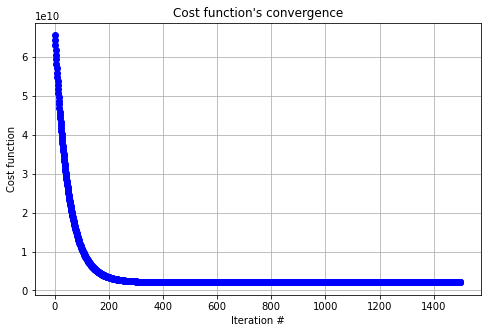

In [14]:
# executing gradient descent with multiple variables, 
# initial theta set to zeros

initial_theta = np.zeros((X_normalized.shape[1],1))
theta, history_theta, vec_j = descendGradient(X_normalized,initial_theta)

# plotting convergence of the cost function
plotConvergence(vec_j)

In [15]:
print ("Final parameter values (thetas): \n",theta)

# validating the output
yval = np.array([1890,3])

# scaling yval
yval_normalized = [(yval[x]-feature_means[x+1])/feature_deviations[x+1] for x in range(len(yval))]
yval_normalized.insert(0,1)
print ("$%0.4f" % float(h(theta,yval_normalized)))

Final parameter values (thetas): 
 [[340412.56301439]
 [109371.67272252]
 [ -6502.3992545 ]]
$326485.4731


### Normal Equation

In [16]:
from numpy.linalg import inv
def normalEqn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

print ("Normal Equation Prediction:")
print ("$%0.4f" % float(h(normalEqn(X,y),[1,1890,3])))

Normal Equation Prediction:
$326492.0261


#### Note: The actual value is 329999 (as per the dataset); safe to say that both the codes do a decent enough job